In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
import seaborn as sns
import shutil
from pathlib import Path

credit_data = pd.read_csv('resources/UCI_Credit_Card.csv', sep=',') 
credit_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Analysis - Part A
## Analysis on:
- Education
- Sex
- Marital Status
- Age Groups
- Correlation Heatmap

In [30]:
credit_data.info()
print(credit_data.isnull().sum())

# Conclusion from running this code is that there are no non-null entries

<class 'pandas.core.frame.DataFrame'>
Index: 29615 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          29615 non-null  int64   
 1   LIMIT_BAL                   29615 non-null  float64 
 2   SEX                         29615 non-null  int64   
 3   EDUCATION                   29615 non-null  int64   
 4   MARRIAGE                    29615 non-null  int64   
 5   AGE                         29615 non-null  int64   
 6   PAY_0                       29615 non-null  int64   
 7   PAY_2                       29615 non-null  int64   
 8   PAY_3                       29615 non-null  int64   
 9   PAY_4                       29615 non-null  int64   
 10  PAY_5                       29615 non-null  int64   
 11  PAY_6                       29615 non-null  int64   
 12  BILL_AMT1                   29615 non-null  float64 
 13  BILL_AMT2            

In [5]:
# Codes 5 and 6 are unknowns for education in Metadata
print(credit_data['EDUCATION'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


In [6]:
# SEX - No missing data for the sex category
print(credit_data['SEX'].value_counts())

SEX
2    18112
1    11888
Name: count, dtype: int64


In [7]:
# MARRIAGE - 54 instances coded as 0
print(credit_data['MARRIAGE'].value_counts())

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [8]:
# Data Cleaning
# MARRIAGE - Drop Code 0
credit_data = credit_data.drop(credit_data[credit_data["MARRIAGE"] == 0].index)

# EDUCATION - Drop codes 5 and 6
credit_data = credit_data.drop(credit_data[credit_data["EDUCATION"] == 5].index)
credit_data = credit_data.drop(credit_data[credit_data["EDUCATION"] == 6].index)
credit_data


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [9]:
# Create a copy of the dataset for heatmap
credit_data_heatmap = credit_data.copy()

In [10]:
# Create bins for Age Groups: 
bins = [20,25,30,35,40,45,50,55,60,65,70,75,80]
bin_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
credit_data["AGE_GROUP"] = pd.cut(credit_data["AGE"], bins, right=False, labels = bin_labels) 
print(credit_data['AGE_GROUP'].value_counts())
print(credit_data['LIMIT_BAL'].max())


# Create bins for limit balances
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000001]
bin_labels = ['0-49999', '50000-99999', '100000-149999', '150000-199999', '200000-249999', '250000-299999', '300000-349999', '350000-399999', '400000-449999', '450000-499999', '500000-549999', '550000-599999', '600000-649999', '650000-699999', '700000-749999', '750000-799999','800000-849999', '850000-899999','900000-949999', '950000<']
credit_data["LIMIT_BAL_GROUP"] = pd.cut(credit_data["LIMIT_BAL"], bins, right=False, labels = bin_labels) 
print(credit_data['LIMIT_BAL_GROUP'].value_counts())

AGE_GROUP
25-29    6867
30-34    6006
35-39    5097
40-44    3806
20-24    2651
45-49    2553
50-54    1594
55-59     706
60-64     227
65-69      83
70-74      21
75-79       4
Name: count, dtype: int64
1000000.0
LIMIT_BAL_GROUP
50000-99999      7060
0-49999          4254
200000-249999    4018
100000-149999    3798
150000-199999    3489
250000-299999    1927
300000-349999    1515
350000-399999    1497
500000-549999     772
400000-449999     675
450000-499999     461
550000-599999      54
600000-649999      50
700000-749999      21
650000-699999      14
750000-799999       7
800000-849999       2
950000<             1
850000-899999       0
900000-949999       0
Name: count, dtype: int64


The next few tables are trying to show the demographic indicators that show and increase probability in defaulting.

In [11]:
# The mean is the percentage that defaulted in the next month
# Count is the number in that group, sum is the number of defaulters in that group

# ANALYSIS - Risk of defaulting is high for youngest age group but decreases to the 30-34 age group, before rising again. 
# Small sample size above 65 years.

age_analysis = credit_data.groupby("AGE_GROUP")["default.payment.next.month"].agg(["count", "sum", "mean"]).reset_index()
age_analysis

C:\Users\User\AppData\Local\Temp\ipykernel_14016\3482451562.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = credit_data.groupby("AGE_GROUP")["default.payment.next.month"].agg(["count", "sum", "mean"]).reset_index()


,AGE_GROUP,count,sum,mean
0,20-24,2651,727,0.274236
1,25-29,6867,1463,0.213048
2,30-34,6006,1171,0.194972
3,35-39,5097,1100,0.215813
4,40-44,3806,858,0.225434
5,45-49,2553,611,0.239326
6,50-54,1594,395,0.247804
7,55-59,706,184,0.260623
8,60-64,227,68,0.299559
9,65-69,83,21,0.253012


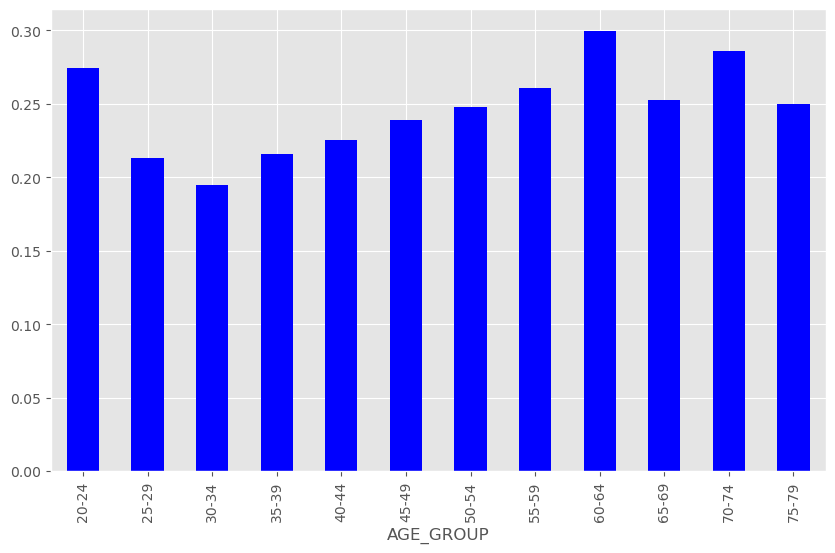

In [12]:
# ANALYSIS - Ages 30-34 have the lowest rate of defaulting, while overall the age group 25-39 have the lowest default rate
age_analysis.plot(x='AGE_GROUP', y='mean', kind='bar', legend=False, color='blue', figsize=(10,6));



In [13]:
# SEX: 1 is male, 2 is female
# The mean is the percentage that defaulted in the next month
# ANALYSIS - Males are more likely to default than females.
sex_analysis = credit_data.groupby("SEX")["default.payment.next.month"].agg(["count", "sum", "mean"])
sex_analysisP = sex_analysis.reset_index()      #created a plot table
sex_analysisP['MF'] = ['M','F']
sex_analysisP

,SEX,count,sum,mean,MF
0,1,11754,2861,0.243406,M
1,2,17861,3744,0.209619,F


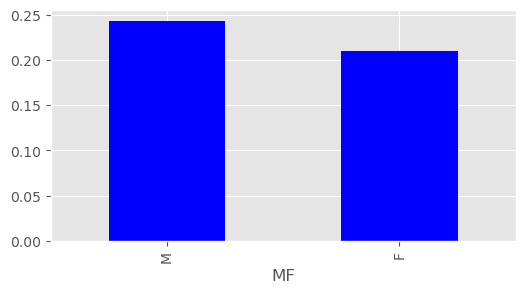

In [14]:
sex_analysisP.plot(x='MF', y='mean', kind='bar', legend=False, color='blue', figsize=(6,3));

In [15]:
# EDUCATION: 0 assume less than a high school degree, 1 is graduate school, 2 is university degree, 3 is high school, 4 is others
# The mean is the percentage that defaulted in the next month
# # ANALYSIS - One easy trend to notice here is that the higher the education, the less likely to default
education_analysis = credit_data.groupby("EDUCATION")["default.payment.next.month"].agg(["count", "sum", "mean"])
education_analysis

,count,sum,mean
EDUCATION,,,
0,14,0,0.000000
1,10581,2036,0.192420
2,14024,3329,0.237379
3,4873,1233,0.253027
4,123,7,0.056911


<Axes: xlabel='EDUCATION'>

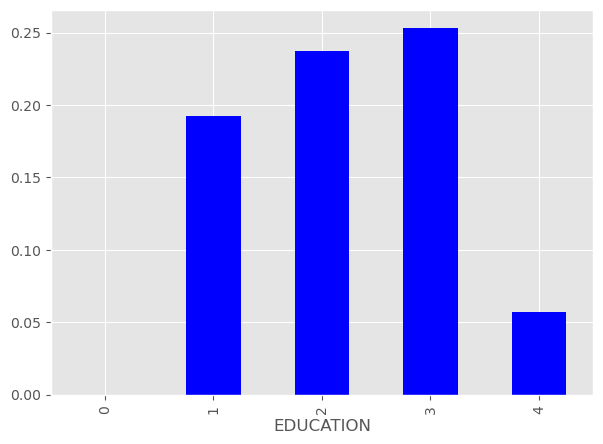

In [16]:
education_analysisP = education_analysis.reset_index()
education_analysisP.plot(x='EDUCATION', y='mean', kind='bar', color='blue', figsize=(7,5), legend=False)

In [17]:
# MARRIAGE:  1 = married, 2 = single, 3 = others
marital_analysis = credit_data.groupby("MARRIAGE")["default.payment.next.month"].agg(["count", "sum", "mean"])
marital_analysis

,count,sum,mean
MARRIAGE,,,
1,13481,3192,0.236778
2,15816,3329,0.210483
3,318,84,0.264151


<Axes: xlabel='MARRIAGE'>

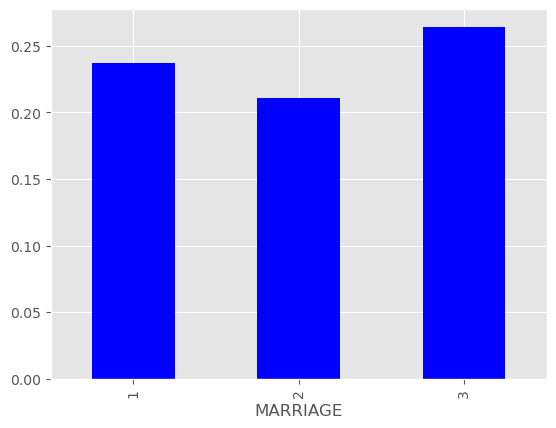

In [18]:
marital_analysis['mean'].plot(kind='bar', color = "blue")

In [19]:
# MARRIAGE + EDUCATION
# ANALYSIS -  married and less education correlates with likely hood of defaulting
marital_education_analysis = credit_data.groupby(["MARRIAGE", "EDUCATION"])["default.payment.next.month"].agg(["count", "sum", "mean"])
marital_education_analysis

count   sum      mean
MARRIAGE EDUCATION                       
1        0              4     0  0.000000
         1           3722   769  0.206609
         2           6842  1666  0.243496
         3           2861   754  0.263544
         4             52     3  0.057692
2        0             10     0  0.000000
         1           6809  1254  0.184168
         2           7020  1619  0.230627
         3           1909   452  0.236773
         4             68     4  0.058824
3        1             50    13  0.260000
         2            162    44  0.271605
         3            103    27  0.262136
         4              3     0  0.000000

<Axes: xlabel='MARRIAGE,EDUCATION'>

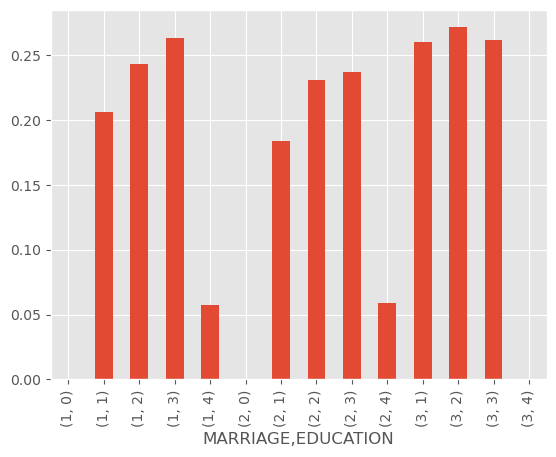

In [20]:
marital_education_analysis['mean'].plot(kind='bar')

In [21]:
# MARRIAGE + SEX
# ANALYSIS - married men are more likely to default, single women are the least likely to default
marital_sex_analysis = credit_data.groupby(["MARRIAGE", "SEX"])["default.payment.next.month"].agg(["count", "sum", "mean"])
marital_sex_analysis

count   sum      mean
MARRIAGE SEX                       
1        1     5128  1338  0.260920
         2     8353  1854  0.221956
2        1     6496  1483  0.228294
         2     9320  1846  0.198069
3        1      130    40  0.307692
         2      188    44  0.234043

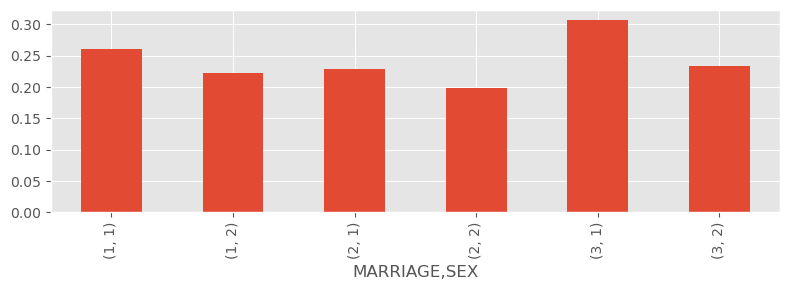

In [22]:
marital_sex_analysis1 = marital_sex_analysis #.reset_index()
marital_sex_analysis1['mean'].plot(subplots=False, kind='bar', figsize = (8, 3))
plt.tight_layout()
plt.show()


In [23]:
# ANALYSIS - Young men are prone to default
marital_sex_analysis = credit_data.groupby(["AGE_GROUP", "SEX"])["default.payment.next.month"].agg(["count", "sum", "mean"])
marital_sex_analysis

C:\Users\User\AppData\Local\Temp\ipykernel_14016\108412079.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_sex_analysis = credit_data.groupby(["AGE_GROUP", "SEX"])["default.payment.next.month"].agg(["count", "sum", "mean"])


count  sum      mean
AGE_GROUP SEX                      
20-24     1      764  232  0.303665
          2     1887  495  0.262321
25-29     1     2483  555  0.223520
          2     4384  908  0.207117
30-34     1     2417  523  0.216384
          2     3589  648  0.180552
35-39     1     2106  525  0.249288
          2     2991  575  0.192243
40-44     1     1595  393  0.246395
          2     2211  465  0.210312
45-49     1     1137  293  0.257696
          2     1416  318  0.224576
50-54     1      715  204  0.285315
          2      879  191  0.217292
55-59     1      360   88  0.244444
          2      346   96  0.277457
60-64     1      119   31  0.260504
          2      108   37  0.342593
65-69     1       45   13  0.288889
          2       38    8  0.210526
70-74     1       10    3  0.300000
          2       11    3  0.272727
75-79     1        3    1  0.333333
          2        1    0  0.000000

In [24]:
marital_sex_analysis = credit_data.groupby(["AGE_GROUP", "MARRIAGE"])["default.payment.next.month"].agg(["count", "sum", "mean"])
marital_sex_analysis

C:\Users\User\AppData\Local\Temp\ipykernel_14016\2419288880.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_sex_analysis = credit_data.groupby(["AGE_GROUP", "MARRIAGE"])["default.payment.next.month"].agg(["count", "sum", "mean"])


count   sum      mean
AGE_GROUP MARRIAGE                       
20-24     1           279    89  0.318996
          2          2362   635  0.268840
          3            10     3  0.300000
25-29     1          1176   297  0.252551
          2          5667  1159  0.204517
          3            24     7  0.291667
30-34     1          2290   500  0.218341
          2          3687   665  0.180363
          3            29     6  0.206897
35-39     1          3159   707  0.223805
          2          1893   385  0.203381
          3            45     8  0.177778
40-44     1          2703   602  0.222716
          2          1041   239  0.229587
          3            62    17  0.274194
45-49     1          1894   467  0.246568
          2           589   127  0.215620
          3            70    17  0.242857
50-54     1          1171   302  0.257899
          2           380    77  0.202632
          3            43    16  0.372093
55-59     1           536   148  0.276119
          2           142    27  0.190141
          3            28     9  0.321429
60-64     1           182    55  0.302198
          2            39    12  0.307692
          3             6     1  0.166667
65-69     1            68    18  0.264706
          2            14     3  0.214286
          3             1     0  0.000000
70-74     1            19     6  0.315789
          2             2     0  0.000000
          3             0     0       NaN
75-79     1             4     1  0.250000
          2             0     0       NaN
          3             0     0       NaN

In [25]:
# SEX + EDUCATION
# ANALYSIS - Male with less education correlates with higher rates of default
sex_education_analysis = credit_data.groupby(["SEX", "EDUCATION"])["default.payment.next.month"].agg(["count", "sum", "mean"])
sex_education_analysis

count   sum      mean
SEX EDUCATION                       
1   0              8     0  0.000000
    1           4353   906  0.208132
    2           5373  1408  0.262051
    3           1978   543  0.274520
    4             42     4  0.095238
2   0              6     0  0.000000
    1           6228  1130  0.181439
    2           8651  1921  0.222055
    3           2895   690  0.238342
    4             81     3  0.037037

<Axes: xlabel='SEX,EDUCATION'>

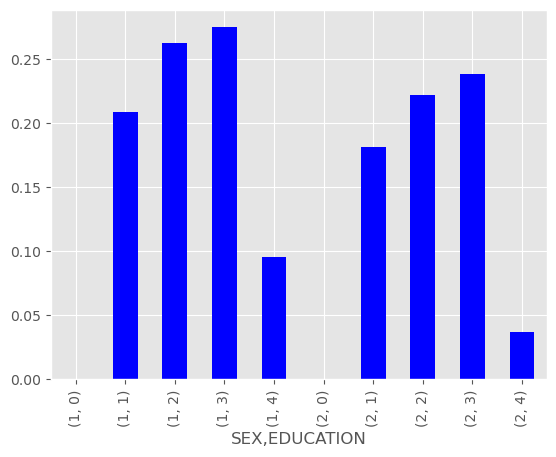

In [26]:
sex_education_analysis['mean'].plot(kind='bar', color='blue')

The next analysis is not about financial indicators that correlate with defaulting.

In [27]:
# ANALYSIS - People with lower limit balances have a higher rate of defaulting
limit_analysis = credit_data.groupby(["LIMIT_BAL_GROUP"])["default.payment.next.month"].agg(["count", "sum", "mean"])
limit_analysis

C:\Users\User\AppData\Local\Temp\ipykernel_14016\490508859.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  limit_analysis = credit_data.groupby(["LIMIT_BAL_GROUP"])["default.payment.next.month"].agg(["count", "sum", "mean"])


,count,sum,mean
LIMIT_BAL_GROUP,,,
0-49999,4254,1549,0.364128
50000-99999,7060,1848,0.261756
100000-149999,3798,906,0.238547
150000-199999,3489,621,0.177988
200000-249999,4018,696,0.173221
250000-299999,1927,286,0.148417
300000-349999,1515,220,0.145215
350000-399999,1497,232,0.154977
400000-449999,675,83,0.122963


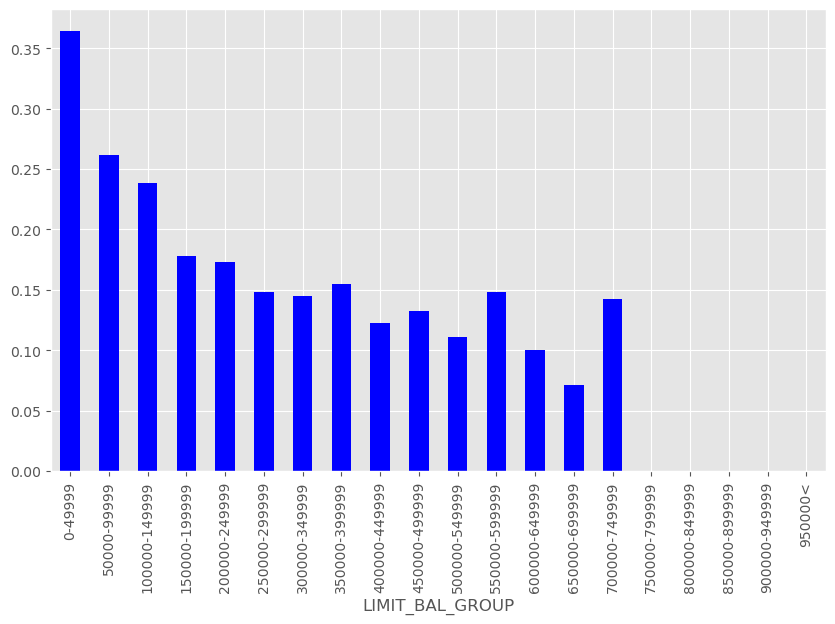

In [28]:
histLimit = limit_analysis.reset_index()
histLimit.plot(x='LIMIT_BAL_GROUP', y='mean', kind='bar', legend=False, color='blue', figsize=(10,6));

# Analysis - Heatmap


#### 1.  Diagonal Line (Self-correlation)
*   The diagonal line from the top-left to the bottom-right is dark red with a correlation of 1. This represents the correlation of each variable with itself.

#### 2.  LIMIT_BAL (Credit Limit)
*   LIMIT_BAL is negatively correlated with PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, and PAY_6 (repayment status variables). This indicates that clients with higher credit limits tend to have better repayment status (lower values in PAY_X indicate timely payments).
*   It shows a moderate positive correlation with AGE.

#### 3.  Repayment Status Variables (PAY_0 to PAY_6)
*   These variables have strong positive correlations with each other (e.g., PAY_0 with PAY_2, PAY_3, etc.). This suggests that clients who miss payments in one month are likely to miss payments in other months as well.
*   These variables also show a moderate positive correlation with the target variable default.payment.next.month, indicating that delayed payments in previous months are associated with a higher likelihood of default.

#### 4.  Billing Amounts (BILL_AMT1 to BILL_AMT6)
*   These variables are highly correlated with each other, which makes sense as the bill amounts from one month to the next are likely to be similar.
*   They also show a moderate positive correlation with LIMIT_BAL, indicating that clients with higher credit limits also tend to have higher bill amounts.

#### 5.  Payment Amounts (PAY_AMT1 to PAY_AMT6)
*   Similar to billing amounts, the payment amounts are highly correlated with each other.

#### 6.  Default Payment Next Month (default.payment.next.month)
*   The target variable default.payment.next.month is positively correlated with the repayment status variables (PAY_0 to PAY_6), indicating that delayed payments increase the likelihood of default.
*   It has a slight negative correlation with LIMIT_BAL, suggesting that clients with higher credit limits are somewhat less likely to default.

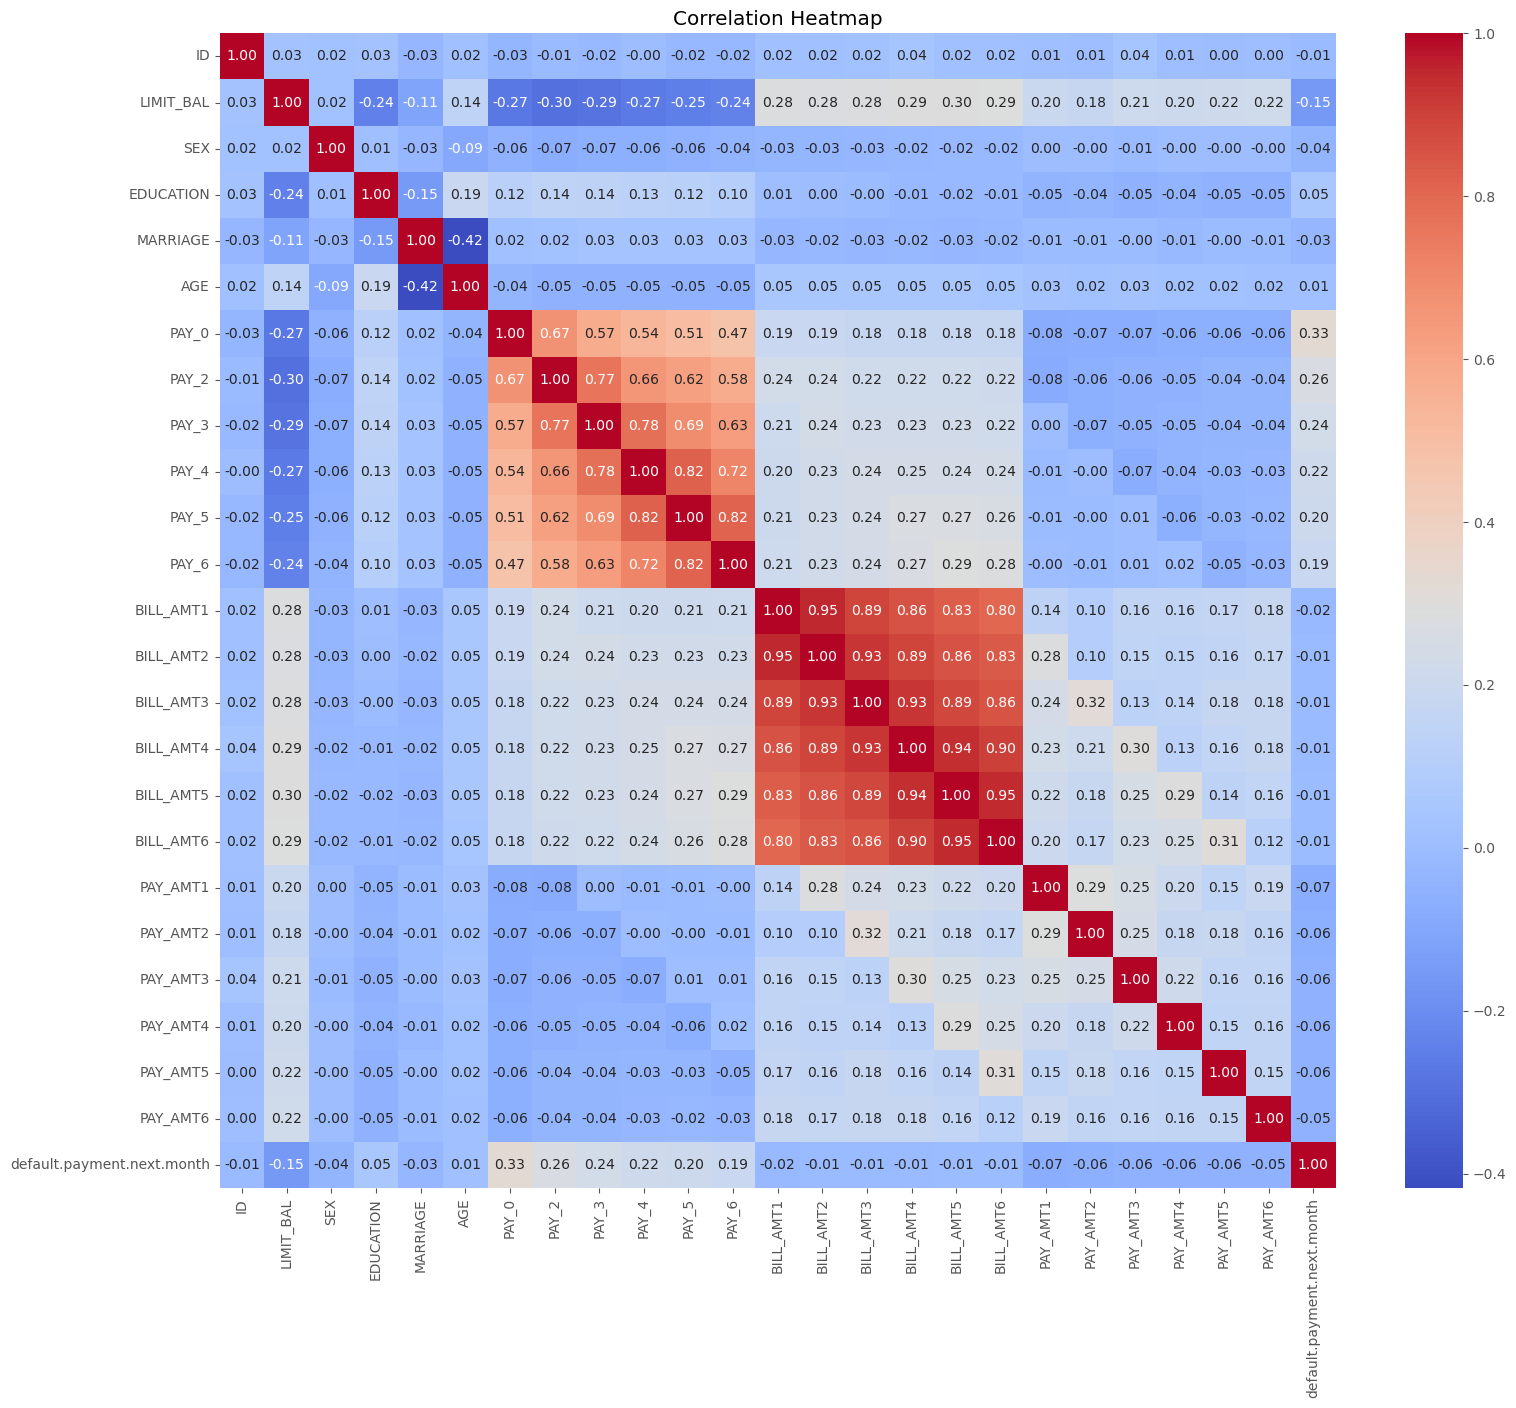

In [29]:
corr = credit_data_heatmap.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Analysis - Part B
## Analysis on Age Groups and Credit Utilization Ratio

Age brackets for segmenting customers in the credit card or banking sector:
- 18-24: Young adults, often starting their financial journey.
- 25-34: Early career professionals, potentially with more significant financial responsibilities.
- 35-44: Mid-career individuals, often with established careers and possibly higher income.
- 45-54: Pre-retirement age, may have accumulated more wealth or financial assets.
- 55-64: Nearing retirement, often focusing on saving and investment.
- 65 and above: Retired or nearing retirement, may have different financial needs and behaviors.

In [31]:
df = credit_data.copy()

In [32]:
# Define age bins and labels
bins = [18,25,35,45,55,65, float('inf')]
labels = ['18-24','25-34','35-44','45-54','55-64','65 and above']

# Original payment delay months
payment_delay_months = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Corresponding month names
month_names = ['September', 'August', 'July', 'June', 'May', 'April']


# Create a dictionary for renaming the payment columns
rename_dict = dict(zip(payment_delay_months, month_names))

# Rename the columns in the DataFrame
df_renamed = df.rename(columns=rename_dict)

# Payment categories mapping
payment_categories = {
    -2: 'Paid Early',
    -1: 'Paid Duly',
    0: 'No Required Payment',
    1: '1 month',
    2: '2 months',
    3: '3 months',
    4: '4 months',
    5: '5 months',
    6: '6 months',
    7: '7 months',
    8: '8 months',
    9: '9 months or more'
}


In [33]:
# Add a new column 'Age_Bin' to the DataFrame
df_renamed['Age_Bin'] = pd.cut(df_renamed['AGE'], bins=bins, labels=labels, right=True)

In [34]:
# Initialize an empty DataFrame to hold the final data
final_df = pd.DataFrame()

Analyzing month and payment category based on Age Group

In [ ]:
# Iterate over each month and payment category, count occurrences and add to the final DataFrame
for month in month_names:
    for value, category in payment_categories.items():
        # Count occurrences for each category in the current month
        count_df = df_renamed[df_renamed[month] == value].groupby('Age_Bin').size().reset_index(name=f'{month}_{category}')
        
        # Merge with the final DataFrame
        if final_df.empty:
            final_df = count_df
        else:
            final_df = final_df.merge(count_df, on='Age_Bin', how='outer')


In [36]:
final_df.head()

,Age_Bin,September_Paid Early,September_Paid Duly,September_No Required Payment,September_1 month,September_2 months,September_3 months,September_4 months,September_5 months,September_6 months,...,April_No Required Payment,April_1 month,April_2 months,April_3 months,April_4 months,April_5 months,April_6 months,April_7 months,April_8 months,April_9 months or more
0,18-24,142,505,2156,474,463,59,21,3,1,...,2382,0,458,45,14,3,5,7,0,0
1,25-34,1193,2436,6396,1601,1007,123,21,7,6,...,6969,0,1165,58,19,5,8,14,1,0
2,35-44,915,1834,3799,1017,714,77,22,11,0,...,4289,0,703,55,4,1,4,13,0,0
3,45-54,379,717,1777,457,363,45,8,2,3,...,1973,0,351,16,7,3,1,11,1,0
4,55-64,73,133,334,107,80,16,4,1,1,...,394,0,70,9,4,1,0,1,0,0


In [37]:
# Save the DataFrame to CSV
final_df.to_csv('resources/final_df.csv.csv', index=True)

In [38]:
# Define the path to save the JSON file
json_file_path = 'final_df.json'

# Convert the DataFrame to JSON
final_df.to_json(json_file_path, orient='records')

# Load and check the JSON file
with open(json_file_path, 'r') as f:
    json_data = f.read()

print(json_data[:500])

[{"Age_Bin":"18-24","September_Paid Early":142,"September_Paid Duly":505,"September_No Required Payment":2156,"September_1 month":474,"September_2 months":463,"September_3 months":59,"September_4 months":21,"September_5 months":3,"September_6 months":1,"September_7 months":0,"September_8 months":3,"September_9 months or more":0,"August_Paid Early":222,"August_Paid Duly":520,"August_No Required Payment":2347,"August_1 month":3,"August_2 months":634,"August_3 months":73,"August_4 months":19,"Augus


Creating a multi-index DataFrame

In [39]:
# Convert 'Age_Bin' to a string type if it is categorical
final_df['Age_Bin'] = final_df['Age_Bin'].astype(str)

In [40]:
# Fill NaN values with 0 (since we're counting occurrences)
final_df = final_df.fillna(0)

In [41]:
# Set 'Age_Bin' as the index
final_df = final_df.set_index('Age_Bin')

In [42]:
# Create MultiIndex for the columns
multi_index_columns = pd.MultiIndex.from_product([month_names, list(payment_categories.values())], names=['Month', 'Category'])


In [43]:
# Rename columns with MultiIndex
final_df.columns = multi_index_columns
final_df

Month         September                                                 \
Category     Paid Early Paid Duly No Required Payment 1 month 2 months   
Age_Bin                                                                  
18-24               142       505                2156     474      463   
25-34              1193      2436                6396    1601     1007   
35-44               915      1834                3799    1017      714   
45-54               379       717                1777     457      363   
55-64                73       133                 334     107       80   
65 and above          9        12                  41       9       13   

Month                                                      ...  \
Category     3 months 4 months 5 months 6 months 7 months  ...   
Age_Bin                                                    ...   
18-24              59       21        3        1        0  ...   
25-34             123       21        7        6        2  ...   
35-44              77       22       11        0        6  ...   
45-54              45        8        2        3        1  ...   
55-64              16        4        1        1        0  ...   
65 and above        0        0        0        0        0  ...   

Month                      April                                              \
Category     No Required Payment 1 month 2 months 3 months 4 months 5 months   
Age_Bin                                                                        
18-24                       2382       0      458       45       14        3   
25-34                       6969       0     1165       58       19        5   
35-44                       4289       0      703       55        4        1   
45-54                       1973       0      351       16        7        3   
55-64                        394       0       70        9        4        1   
65 and above                  47       0        9        0        1        0   

Month                                                     
Category     6 months 7 months 8 months 9 months or more  
Age_Bin                                                   
18-24               5        7        0                0  
25-34               8       14        1                0  
35-44               4       13        0                0  
45-54               1       11        1                0  
55-64               0        1        0                0  
65 and above        1        0        0                0  

[6 rows x 72 columns]

# Credit Utilization Ratio 
(Outstanding Balance / Credit limit * 100%) 

In [51]:
df_cur = df.copy()

In [52]:
# Define age bins and labels
bins = [18,25,35,45,55,64, float('inf')]
labels = ['18-24','24-34','35-44','45-54','55-64','65 and above']
df_cur['Age_Bin'] = pd.cut(df_cur['AGE'], bins=bins, labels=labels, right=True)

# Filter for the specific Age_Bin '35-44'
age_bin_filtered_df = df_cur[df_cur['Age_Bin'] == '35-44']

# Count occurrences of the value 7 in 'PAY_0'
count_value_7 = (age_bin_filtered_df['PAY_0'] == -2).sum()

print("Count of value 7 in 'PAY_0' for 'Age_Bin' 35-44:", count_value_7)

Count of value 7 in 'PAY_0' for 'Age_Bin' 35-44: 915


In [53]:
# Define the column for September's outstanding balance and the credit limit column
sept_outstanding_bal = 'BILL_AMT1'
credit_limit_column = 'LIMIT_BAL'

In [54]:
# Calculate the credit utilization ratio for September and round to 2 decimal places
df_cur['CUR_Sept(%)'] = (df_cur[sept_outstanding_bal] / df_cur[credit_limit_column] * 100).round(2)
print(df_cur[['ID', sept_outstanding_bal, credit_limit_column, 'CUR_Sept(%)']].head())

   ID  BILL_AMT1  LIMIT_BAL  CUR_Sept(%)
0   1     3913.0    20000.0        19.56
1   2     2682.0   120000.0         2.24
2   3    29239.0    90000.0        32.49
3   4    46990.0    50000.0        93.98
4   5     8617.0    50000.0        17.23


In [55]:
low_CUR_df = df_cur[df_cur['CUR_Sept(%)'] < 30]
low_CUR_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AGE_GROUP,LIMIT_BAL_GROUP,CUR_Sept(%),Age_Bin
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,1,20-24,0-49999,19.56,18-24
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,25-29,100000-149999,2.24,24-34
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,55-59,50000-99999,17.23,55-64
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,601.0,0.0,581.0,1687.0,1542.0,0,20-24,100000-149999,11.88,18-24
8,9,140000.0,2,3,1,28,0,0,2,0,...,0.0,432.0,1000.0,1000.0,1000.0,0,25-29,100000-149999,8.06,24-34


In [56]:
# Define age bins and labels
bins = [18,25,35,45,55,64, float('inf')]
labels = ['18-24','25-34','35-44','45-54','55-64','65 and above']

In [57]:
# Assign age bins to a new column 'Age_Bin'
df_cur['Age_Bin'] = pd.cut(df_cur['AGE'], bins=bins, labels=labels, right=True)

In [58]:
# Calculate the mean of CUR below 30% for each age group
age_group_low_CUR = low_CUR_df.groupby('Age_Bin')['CUR_Sept(%)'].mean().round(2)
age_group_low_CUR.head()

C:\Users\User\AppData\Local\Temp\ipykernel_14016\1133296761.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_low_CUR = low_CUR_df.groupby('Age_Bin')['CUR_Sept(%)'].mean().round(2)


Age_Bin
18-24    8.70
24-34    6.31
35-44    5.48
45-54    5.46
55-64    4.80
Name: CUR_Sept(%), dtype: float64

In [59]:
# Calculate the mean of CUR for each age group
age_group_CUR = df_cur.groupby('Age_Bin')['CUR_Sept(%)'].mean().round(2)

# Display the results
print(age_group_CUR)


Age_Bin
18-24           54.91
25-34           39.35
35-44           39.21
45-54           44.84
55-64           46.24
65 and above    48.66
Name: CUR_Sept(%), dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_14016\3774360883.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_CUR = df_cur.groupby('Age_Bin')['CUR_Sept(%)'].mean().round(2)


In [60]:
# To have a good credit history, have CUR below 10%
good_CUR_df = df_cur[df_cur['CUR_Sept(%)'] <= 10] 
good_CUR_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AGE_GROUP,LIMIT_BAL_GROUP,CUR_Sept(%),Age_Bin
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,25-29,100000-149999,2.24,25-34
8,9,140000.0,2,3,1,28,0,0,2,0,...,0.0,432.0,1000.0,1000.0,1000.0,0,25-29,100000-149999,8.06,25-34
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,0.0,13007.0,1122.0,0.0,0,35-39,0-49999,0.00,25-34
10,11,200000.0,2,3,2,34,0,0,2,0,...,12.0,50.0,300.0,3738.0,66.0,0,30-34,200000-249999,5.54,25-34
11,12,260000.0,2,1,2,51,-1,-1,-1,-1,...,9966.0,8583.0,22301.0,0.0,3640.0,0,50-54,250000-299999,4.72,45-54


In [61]:
# Calculate the mean of CUR for each age group
age_group_CUR = good_CUR_df.groupby('Age_Bin')['CUR_Sept(%)'].mean().round(2)
age_group_CUR

C:\Users\User\AppData\Local\Temp\ipykernel_14016\234080574.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_CUR = good_CUR_df.groupby('Age_Bin')['CUR_Sept(%)'].mean().round(2)


Age_Bin
18-24           2.48
25-34           2.14
35-44           1.97
45-54           1.85
55-64           1.66
65 and above    0.77
Name: CUR_Sept(%), dtype: float64

# Analysis - Part C
## Analysis on Distribution of late payments

In [62]:
card_data = credit_data.copy()

In [68]:
card_data = card_data.rename(columns={'PAY_0': 'PAY_SEPT',
                                      'PAY_2': 'PAY_AUG',
                                      'PAY_3': 'PAY_JULY',
                                      'PAY_4': 'PAY_JUNE',
                                      'PAY_5': 'PAY_MAY',
                                      'PAY_6': 'PAY_APR',
                                      'BILL_AMT1': 'BILL_AMT_SEPT',
                                      'BILL_AMT2': 'BILL_AMT_AUG',
                                      'BILL_AMT3': 'BILL_AMT_JULY',
                                      'BILL_AMT4': 'BILL_AMT_JUNE',
                                      'BILL_AMT5': 'BILL_AMT_MAY',
                                      'BILL_AMT6': 'BILL_AMT_APR',
                                      'PAY_AMT1': 'PAY_AMT_SEPT',
                                      'PAY_AMT2': 'PAY_AMT_AUG',
                                      'PAY_AMT3': 'PAY_AMT_JULY',
                                      'PAY_AMT4': 'PAY_AMT_JUNE',
                                      'PAY_AMT5': 'PAY_AMT_MAY',
                                      'PAY_AMT6': 'PAY_AMT_APR',
                                      'default.payment.next.month': 'default payment next month'})

card_data.head()

,id,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_july,pay_june,...,bill_amt_apr,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default payment next month,age_group,limit_bal_group
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,20-24,0-49999
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,25-29,100000-149999
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-34,50000-99999
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,35-39,50000-99999
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,55-59,50000-99999


In [69]:
card_data.columns = card_data.columns.str.lower()

In [70]:
card_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29615 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          29615 non-null  int64   
 1   limit_bal                   29615 non-null  float64 
 2   sex                         29615 non-null  int64   
 3   education                   29615 non-null  int64   
 4   marriage                    29615 non-null  int64   
 5   age                         29615 non-null  int64   
 6   pay_sept                    29615 non-null  int64   
 7   pay_aug                     29615 non-null  int64   
 8   pay_july                    29615 non-null  int64   
 9   pay_june                    29615 non-null  int64   
 10  pay_may                     29615 non-null  int64   
 11  pay_apr                     29615 non-null  int64   
 12  bill_amt_sept               29615 non-null  float64 
 13  bill_amt_aug         

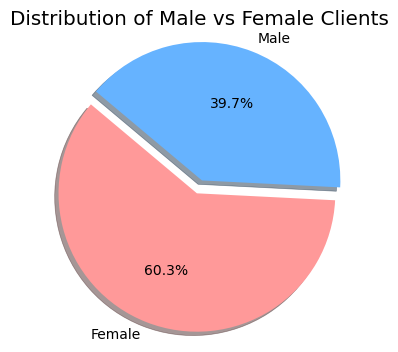

In [71]:
# Plotting a Pie Chart for overall distribution of SEX
female_count = card_data[(card_data['sex'] == 2)].count()['id']
male_count = card_data[(card_data['sex'] == 1)].count()['id']

labels = ['Female', 'Male']
sizes = [female_count, male_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribution of Male vs Female Clients')
plt.axis('equal')

plt.show()



In [72]:
female_default_count = card_data[(card_data['sex'] == 2) & (card_data['default payment next month'] == 1)].count()
female_default_count = female_default_count['id']

male_default_count = card_data[(card_data['sex'] == 1) & (card_data['default payment next month'] == 1)].count()
male_default_count = male_default_count['id']

print(f'There are {female_default_count} female default accounts')
print(f'There are {male_default_count} male default accounts')


There are 3744 female default accounts
There are 2861 male default accounts


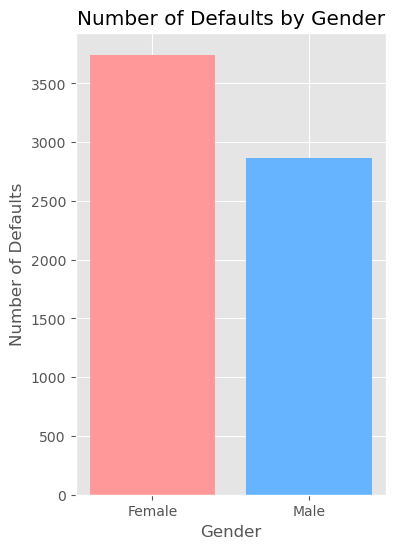

In [73]:
labels = ['Female', 'Male']
default_counts = [female_default_count, male_default_count]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(4, 6))
plt.bar(labels, default_counts, color=colors)
plt.xlabel('Gender')
plt.ylabel('Number of Defaults')
plt.title('Number of Defaults by Gender')
plt.show()

In [74]:
# Setting up payment columns
payment_status_columns = ['pay_sept', 'pay_aug', 'pay_july', 'pay_june', 'pay_may', 'pay_apr']

# Count the number of late payments for each client
late_payment_flags = card_data[payment_status_columns] > 0
card_data['late_payments'] = late_payment_flags.sum(axis=1)

# Sum the number of months late for each client
positive_payments = card_data[payment_status_columns].clip(lower=0)
card_data['total_months_late'] = positive_payments.sum(axis=1)

# Checking to see new column 'late_payments' & 'total_months_late'
card_data.head(10)


,id,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_july,pay_june,...,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_apr,default payment next month,age_group,limit_bal_group,late_payments,total_months_late
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,1,20-24,0-49999,2,4
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,25-29,100000-149999,2,4
2,3,90000.0,2,2,2,34,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,30-34,50000-99999,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,35-39,50000-99999,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,55-59,50000-99999,0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,1815.0,657.0,1000.0,1000.0,800.0,0,35-39,50000-99999,0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,40000.0,38000.0,20239.0,13750.0,13770.0,0,25-29,500000-549999,0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,601.0,0.0,581.0,1687.0,1542.0,0,20-24,100000-149999,0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,0.0,432.0,1000.0,1000.0,1000.0,0,25-29,100000-149999,1,2
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,0.0,13007.0,1122.0,0.0,0,35-39,0-49999,0,0


In [75]:
late_payments_counts = card_data['late_payments'].value_counts()
late_payments_counts

late_payments
0    19615
1     4385
2     1885
6     1334
3     1150
4      948
5      298
Name: count, dtype: int64

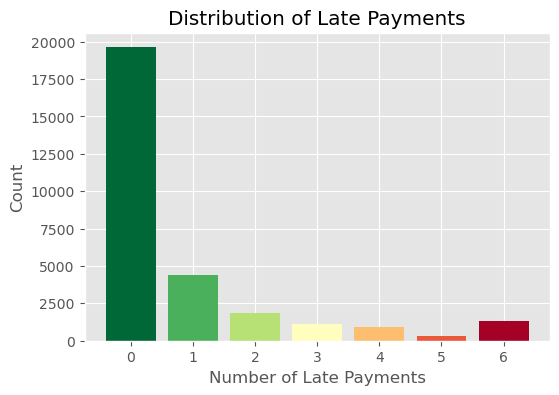

In [76]:
late_payments_counts_dict = late_payments_counts.to_dict()

labels = list(late_payments_counts_dict.keys())
counts = list(late_payments_counts_dict.values())

# Create a color gradient from green to red for 0-6
colors = plt.cm.RdYlGn_r(np.linspace(0, 1, 7))

# Setting the bar colors as gradient
bar_colors = []
for label in labels:
    if label <= 6:
        bar_colors.append(colors[label])
    else:
        bar_colors.append(colors[-1])

# Create the bar graph
plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=bar_colors)
plt.xlabel('Number of Late Payments')
plt.ylabel('Count')
plt.title('Distribution of Late Payments')
plt.show()

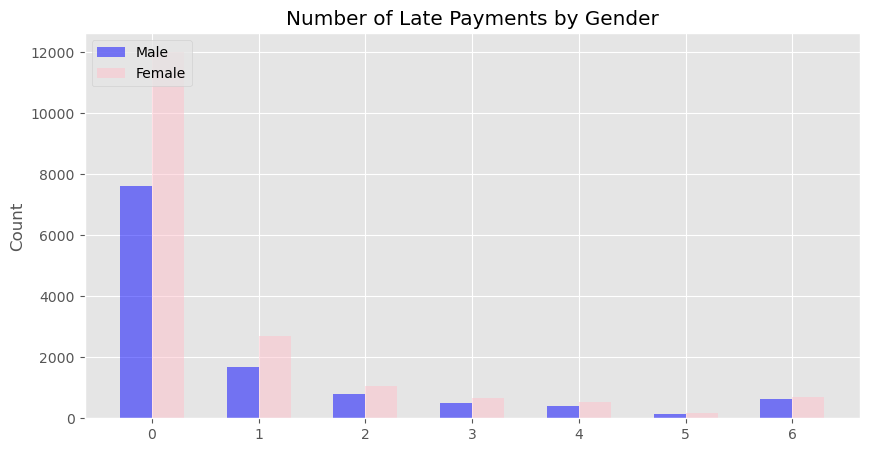

In [77]:
# Group by late_payments and sex, and count the occurrences
grouped = card_data.groupby(['late_payments', 'sex']).size().unstack(fill_value=0)

# Set the positions and width for the bars
pos = list(range(len(grouped)))
width = 0.3

# Plotting the bars
fig, ax = plt.subplots(figsize=(10, 5))

# Create bars for male
plt.bar(pos, grouped[1], width, alpha=0.5, color='blue', label='Male')

# Create bars for female
plt.bar([p + width for p in pos], grouped[2], width, alpha=0.5, color='pink', label='Female')

# Set the y axis label
ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Number of Late Payments by Gender')

# Set the position of the x ticks
ax.set_xticks([p + width / 2 for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(grouped.index)

# Adding the legend and showing the plot
plt.legend(['Male', 'Female'], loc='upper left')
plt.show()

In [78]:
sept_outstanding_bal = 'bill_amt_sept'
credit_limit_column = 'limit_bal'

In [79]:
card_data['cur_sept(%)'] = (card_data[sept_outstanding_bal] / card_data[credit_limit_column] * 100).round(2)
card_data.shape

(29615, 30)

In [80]:
card_data['cur_sept_category'] = card_data['cur_sept(%)'].apply(lambda x: 'above 30' if x > 30 else '30 or below')

card_data.head()

,id,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_july,pay_june,...,pay_amt_june,pay_amt_may,pay_amt_apr,default payment next month,age_group,limit_bal_group,late_payments,total_months_late,cur_sept(%),cur_sept_category
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,1,20-24,0-49999,2,4,19.56,30 or below
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,0.0,2000.0,1,25-29,100000-149999,2,4,2.24,30 or below
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,5000.0,0,30-34,50000-99999,0,0,32.49,above 30
3,4,50000.0,2,2,1,37,0,0,0,0,...,1100.0,1069.0,1000.0,0,35-39,50000-99999,0,0,93.98,above 30
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,9000.0,689.0,679.0,0,55-59,50000-99999,0,0,17.23,30 or below


In [81]:
bins = [18, 24, 34, 44, 54, 64, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
card_data['age_bin'] = pd.cut(card_data['age'], bins=bins, labels=labels, right=False)

# Group the data
grouped_data = card_data.groupby(['cur_sept_category', 'sex', 'marriage', 'age_bin', 'education', 'late_payments']).size().reset_index(name='count')

# Convert to the required JSON format
json_data2 = []
for _, row in grouped_data.iterrows():
    json_data2.append({
        'cur_sept_category': row['cur_sept_category'],
        'late_payments': int(row['late_payments']),
        'sex': 'male' if row['sex'] == 1 else 'female',
        'marriage': 'single' if row['marriage'] == 1 else 'married' if row['marriage'] == 2 else 'others',
        'age_bin': str(row['age_bin']),
        'education': 'graduate school' if row['education'] == 1 else 'university' if row['education'] == 2 else 'high school' if row['education'] == 3 else 'others' if row['education'] == 4 else 'unknown',
        'count': int(row['count'])
    })

# Save to a JSON file
import json
with open('data2.json', 'w') as f:
    json.dump(json_data2, f, indent=4)

C:\Users\User\AppData\Local\Temp\ipykernel_14016\1548732420.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = card_data.groupby(['cur_sept_category', 'sex', 'marriage', 'age_bin', 'education', 'late_payments']).size().reset_index(name='count')


In [82]:
# Number of females that were 6 times late to the payment
female_count_6_late = card_data[(card_data['sex'] == 2) & (card_data['late_payments'] == 6)].count()
female_count_6_late = female_count_6_late['id']

# Number of males that were 6 times late to the payment
male_count_6_late = card_data[(card_data['sex'] == 1) & (card_data['late_payments'] == 6)].count()
male_count_6_late = male_count_6_late['id']


In [83]:
# Number of females (married) that were 6 times late to the payment
female_count_6_late_married = card_data[(card_data['sex'] == 2) & (card_data['late_payments'] == 6) & (card_data['marriage'] == 1)].count()
female_count_6_late_married = female_count_6_late_married['id']

# Number of males (married) that were 6 times late to the payment
male_count_6_late_married = card_data[(card_data['sex'] == 1) & (card_data['late_payments'] == 6) & (card_data['marriage'] == 1)].count()
male_count_6_late_married = male_count_6_late_married['id']

print(f'Within {female_count_6_late} females that were late to the payment 6 times, {female_count_6_late_married} were married')
print(f'Within {male_count_6_late} males that were late to the payment 6 times, {male_count_6_late_married} were married')

Within 708 females that were late to the payment 6 times, 354 were married
Within 626 males that were late to the payment 6 times, 289 were married


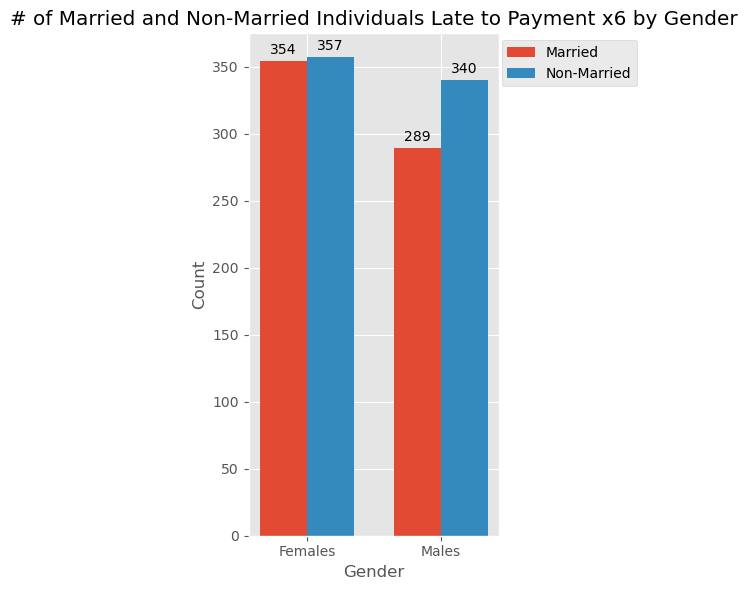

In [84]:
female_count_6_late_non_married = 357
male_count_6_late_non_married = 340

categories = ['Females', 'Males']
married_counts = [female_count_6_late_married, male_count_6_late_married]
non_married_counts = [female_count_6_late_non_married, male_count_6_late_non_married]

# Create the bar graph
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(6, 6))
bars1 = plt.bar(x - width/2, married_counts, width, label='Married')
bars2 = plt.bar(x + width/2, non_married_counts, width, label='Non-Married')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('# of Married and Non-Married Individuals Late to Payment x6 by Gender')
plt.xticks(x, categories)
plt.legend(loc='upper right', bbox_to_anchor=(1.58, 1))

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()

In [85]:
# Table with only late payment accounts
late_card_data = card_data[card_data['late_payments'] >= 1].copy()
late_card_data.head()

,id,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_july,pay_june,...,pay_amt_may,pay_amt_apr,default payment next month,age_group,limit_bal_group,late_payments,total_months_late,cur_sept(%),cur_sept_category,age_bin
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,1,20-24,0-49999,2,4,19.56,30 or below,25-34
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,2000.0,1,25-29,100000-149999,2,4,2.24,30 or below,25-34
8,9,140000.0,2,3,1,28,0,0,2,0,...,1000.0,1000.0,0,25-29,100000-149999,1,2,8.06,30 or below,25-34
10,11,200000.0,2,3,2,34,0,0,2,0,...,3738.0,66.0,0,30-34,200000-249999,1,2,5.54,30 or below,35-44
11,12,260000.0,2,1,2,51,-1,-1,-1,-1,...,0.0,3640.0,0,50-54,250000-299999,1,2,4.72,30 or below,45-54


In [86]:
ontime_card_data = card_data[card_data['late_payments'] == 0].copy()
ontime_card_data

,id,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_july,pay_june,...,pay_amt_may,pay_amt_apr,default payment next month,age_group,limit_bal_group,late_payments,total_months_late,cur_sept(%),cur_sept_category,age_bin
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,5000.0,0,30-34,50000-99999,0,0,32.49,above 30,35-44
3,4,50000.0,2,2,1,37,0,0,0,0,...,1069.0,1000.0,0,35-39,50000-99999,0,0,93.98,above 30,35-44
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,689.0,679.0,0,55-59,50000-99999,0,0,17.23,30 or below,55-64
5,6,50000.0,1,1,2,37,0,0,0,0,...,1000.0,800.0,0,35-39,50000-99999,0,0,128.80,above 30,35-44
6,7,500000.0,1,1,2,29,0,0,0,0,...,13750.0,13770.0,0,25-29,500000-549999,0,0,73.59,above 30,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,29993,10000.0,1,3,1,43,0,0,0,-2,...,0.0,0.0,0,40-44,0-49999,0,0,88.02,above 30,35-44
29993,29994,100000.0,1,1,2,38,0,-1,-1,0,...,2000.0,2000.0,0,35-39,100000-149999,0,0,3.04,30 or below,35-44
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,5000.0,1000.0,0,35-39,200000-249999,0,0,85.89,above 30,35-44
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,0.0,0.0,0,40-44,150000-199999,0,0,1.12,30 or below,35-44


In [87]:
# Max dollar value that accounts owe at the end of the cycle (september)
late_payment_bill_max = late_card_data['bill_amt_sept'].max()
print(late_payment_bill_max)

# Min dollar value that accounts owe at the end of the cycle (september)
late_payment_bill_min = late_card_data['bill_amt_sept'].min()
print(late_payment_bill_min)

# Average dollar value that accounts owe at the end of the cycle (september)
late_payment_bill_avg_sept = "{:.2f}".format(late_card_data['bill_amt_sept'].mean())
print(late_payment_bill_avg_sept)

613860.0
-165580.0
41911.61


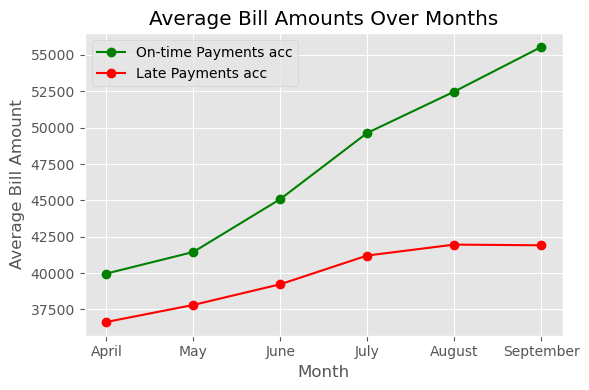

In [88]:
# Average bill amounts for on-time payments
ontime_payment_bill_avg_sept = float("{:.2f}".format(ontime_card_data['bill_amt_sept'].mean()))
ontime_payment_bill_avg_aug = float("{:.2f}".format(ontime_card_data['bill_amt_aug'].mean()))
ontime_payment_bill_avg_july = float("{:.2f}".format(ontime_card_data['bill_amt_july'].mean()))
ontime_payment_bill_avg_june = float("{:.2f}".format(ontime_card_data['bill_amt_june'].mean()))
ontime_payment_bill_avg_may = float("{:.2f}".format(ontime_card_data['bill_amt_may'].mean()))
ontime_payment_bill_avg_apr = float("{:.2f}".format(ontime_card_data['bill_amt_apr'].mean()))

# Average bill amounts for late payments
late_payment_bill_avg_sept = float("{:.2f}".format(late_card_data['bill_amt_sept'].mean()))
late_payment_bill_avg_aug = float("{:.2f}".format(late_card_data['bill_amt_aug'].mean()))
late_payment_bill_avg_july = float("{:.2f}".format(late_card_data['bill_amt_july'].mean()))
late_payment_bill_avg_june = float("{:.2f}".format(late_card_data['bill_amt_june'].mean()))
late_payment_bill_avg_may = float("{:.2f}".format(late_card_data['bill_amt_may'].mean()))
late_payment_bill_avg_apr = float("{:.2f}".format(late_card_data['bill_amt_apr'].mean()))

# Data for the line graphs
months = ['April', 'May', 'June', 'July', 'August', 'September']
ontime_avg_bills = [
    ontime_payment_bill_avg_apr,
    ontime_payment_bill_avg_may,
    ontime_payment_bill_avg_june,
    ontime_payment_bill_avg_july,
    ontime_payment_bill_avg_aug,
    ontime_payment_bill_avg_sept
]

late_avg_bills = [
    late_payment_bill_avg_apr,
    late_payment_bill_avg_may,
    late_payment_bill_avg_june,
    late_payment_bill_avg_july,
    late_payment_bill_avg_aug,
    late_payment_bill_avg_sept
]


plt.figure(figsize=(6, 4))
plt.plot(months, ontime_avg_bills, marker='o', linestyle='-', color='g', label='On-time Payments acc')
plt.plot(months, late_avg_bills, marker='o', linestyle='-', color='r', label='Late Payments acc')
plt.xlabel('Month')
plt.ylabel('Average Bill Amount')
plt.title('Average Bill Amounts Over Months')
plt.legend(loc='upper left')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Analysis - Part D
## Adding Columns to be used in the visualizations for Monthly Spend analysis

In [91]:
df = credit_data.copy()

In [92]:
# -------------------MONTHY Spend columns
# Add the new column 'SPEND1-september spend SPENd2 - august spend.... '
df['SPEND1'] = df['BILL_AMT1'] + df['PAY_AMT1'] - df['BILL_AMT2']
df['SPEND2'] = df['BILL_AMT2'] + df['PAY_AMT2'] - df['BILL_AMT3']
df['SPEND3'] = df['BILL_AMT3'] + df['PAY_AMT3'] - df['BILL_AMT4']
df['SPEND4'] = df['BILL_AMT4'] + df['PAY_AMT4'] - df['BILL_AMT5']
df['SPEND5'] = df['BILL_AMT5'] + df['PAY_AMT5'] - df['BILL_AMT6']


In [93]:
# -------------------Available columns  Assume Credit limit doesn't change for 6 months
# Add the new column 'Available_credit1-september  Available_credit2 - august .... '
df['Available_credit1'] = df['LIMIT_BAL'] - df['BILL_AMT1']
df['Available_credit2'] = df['LIMIT_BAL'] - df['BILL_AMT2']
df['Available_credit3'] = df['LIMIT_BAL'] - df['BILL_AMT3']
df['Available_credit4'] = df['LIMIT_BAL'] - df['BILL_AMT4']
df['Available_credit5'] = df['LIMIT_BAL'] - df['BILL_AMT5']
df['Available_credit6'] = df['LIMIT_BAL'] - df['BILL_AMT6']

In [94]:
# -------------------% of limit spent at month end  Assume Credit limit doesn't change for 6 months
# Add the new column 'Percent_limit_spent1-september month end balance/credit limit Percent_limit_spent2- august month end balance/credit limit Available_credit2 - august .... ' '
df['Percent_limit_spent1'] = df['BILL_AMT1'] / df['LIMIT_BAL']
df['Percent_limit_spent2'] = df['BILL_AMT2'] / df['LIMIT_BAL']
df['Percent_limit_spent3'] = df['BILL_AMT3'] / df['LIMIT_BAL']
df['Percent_limit_spent4'] = df['BILL_AMT4'] / df['LIMIT_BAL']
df['Percent_limit_spent5'] = df['BILL_AMT5'] / df['LIMIT_BAL']
df['Percent_limit_spent6'] = df['BILL_AMT6'] / df['LIMIT_BAL']

In [95]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,Available_credit3,Available_credit4,Available_credit5,Available_credit6,Percent_limit_spent1,Percent_limit_spent2,Percent_limit_spent3,Percent_limit_spent4,Percent_limit_spent5,Percent_limit_spent6
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,19311.0,20000.0,20000.0,20000.0,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000
1,2,120000.0,2,2,2,26,-1,2,0,0,...,117318.0,116728.0,116545.0,116739.0,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175
2,3,90000.0,2,2,2,34,0,0,0,0,...,76441.0,75669.0,75052.0,74451.0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767
3,4,50000.0,2,2,1,37,0,0,0,0,...,709.0,21686.0,21041.0,20453.0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,14165.0,29060.0,30854.0,30869.0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620


# Analysis - Part E
## Analysis on Payment Pattern

In [96]:
# Read the data into a Pandas DataFrame
customer_df=pd.read_csv('resources/credit_card_demographics.csv')
customer_df.head()

,customer_id,gender,education,marital_status,age
0,1,F,university,married,24
1,2,F,university,single,26
2,3,F,university,single,34
3,4,F,university,married,37
4,5,M,university,married,57


In [97]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     30000 non-null  int64 
 1   gender          30000 non-null  object
 2   education       30000 non-null  object
 3   marital_status  29946 non-null  object
 4   age             30000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [99]:
payments_df = pd.read_csv('Resources/credit_card_payments.csv')
payments_df.head()

,customer_id,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,repayment_status_may,repayment_status_april,statement_bal_aug,statement_bal_jul,...,statement_bal_may,statement_bal_April,statement_bal_march,payment_aug,payment_july,payment_june,payment_may,payment_april,payment_mar,default_payment_next_month
0,1,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,-1,2,0,0,0,2,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,0,0,0,0,0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,0,0,0,0,0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [100]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 30000 non-null  int64  
 1   credit_limit                30000 non-null  float64
 2   repayment_status_sept       30000 non-null  int64  
 3   repayment_status_aug        30000 non-null  int64  
 4   repayment_status_jul        30000 non-null  int64  
 5   repayment_status_jun        30000 non-null  int64  
 6   repayment_status_may        30000 non-null  int64  
 7   repayment_status_april      30000 non-null  int64  
 8   statement_bal_aug           30000 non-null  float64
 9   statement_bal_jul           30000 non-null  float64
 10  statement_bal_june          30000 non-null  float64
 11  statement_bal_may           30000 non-null  float64
 12  statement_bal_April         30000 non-null  float64
 13  statement_bal_march         300

In [101]:
# Define a mapping of old column names to new column names
rename_columns = {
    'payment_aug': 'payment_sept',
    'payment_july': 'payment_aug',
    'payment_june': 'payment_july',
    'payment_may': 'payment_june',
    'payment_april': 'payment_may',
    'payment_mar': 'payment_april'
}

# Rename the columns in the DataFrame
payments_df.rename(columns=rename_columns, inplace=True)

# Display the first few rows to verify the renaming
payments_df.head()

,customer_id,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,repayment_status_may,repayment_status_april,statement_bal_aug,statement_bal_jul,...,statement_bal_may,statement_bal_April,statement_bal_march,payment_sept,payment_aug,payment_july,payment_june,payment_may,payment_april,default_payment_next_month
0,1,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,-1,2,0,0,0,2,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,0,0,0,0,0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,0,0,0,0,0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [103]:
merged_df=pd.merge(customer_df,payments_df,on=['customer_id'])
merged_df.head()

,customer_id,gender,education,marital_status,age,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,statement_bal_may,statement_bal_April,statement_bal_march,payment_sept,payment_aug,payment_july,payment_june,payment_may,payment_april,default_payment_next_month
0,1,F,university,married,24,20000.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,F,university,single,26,120000.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,F,university,single,34,90000.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,F,university,married,37,50000.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,M,university,married,57,50000.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


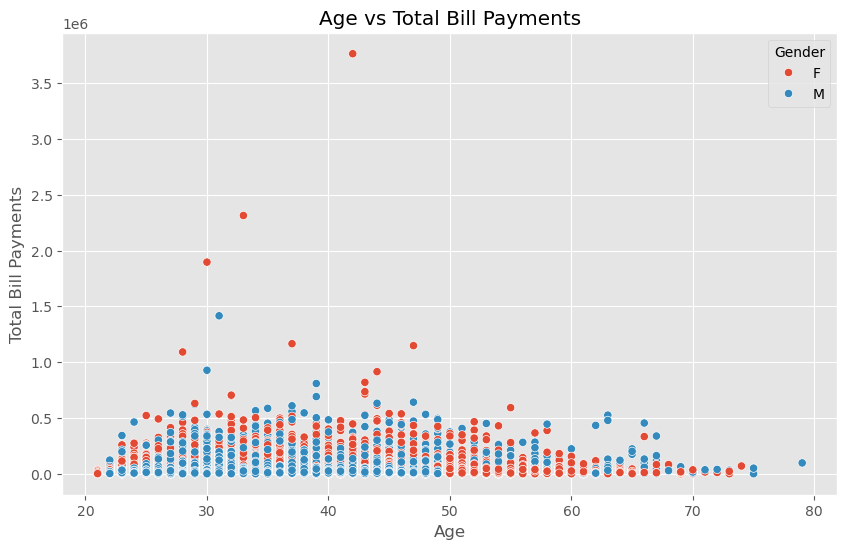

In [104]:
merged_df['total_payments'] = merged_df[['payment_sept', 'payment_aug', 'payment_july', 'payment_june', 'payment_may', 'payment_april']].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='age', y='total_payments', hue='gender')
plt.title('Age vs Total Bill Payments')
plt.xlabel('Age')
plt.ylabel('Total Bill Payments')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14016\3942105307.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_payments = merged_df.groupby(['age_group', 'gender'])['total_payments'].mean().unstack()


Average payments by age group and gender:
gender                F             M
age_group                            
18-30      26570.101241  27267.698594
31-40      35567.999528  35590.804951
41-50      35286.801346  33762.048705
51-60      27677.089524  28493.625132
60+        23170.585366  42003.409396
Correlation between age and total payments: 0.04


<Figure size 1200x600 with 0 Axes>

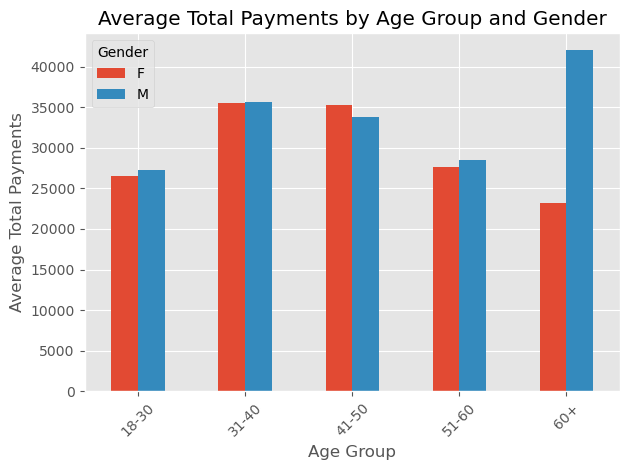

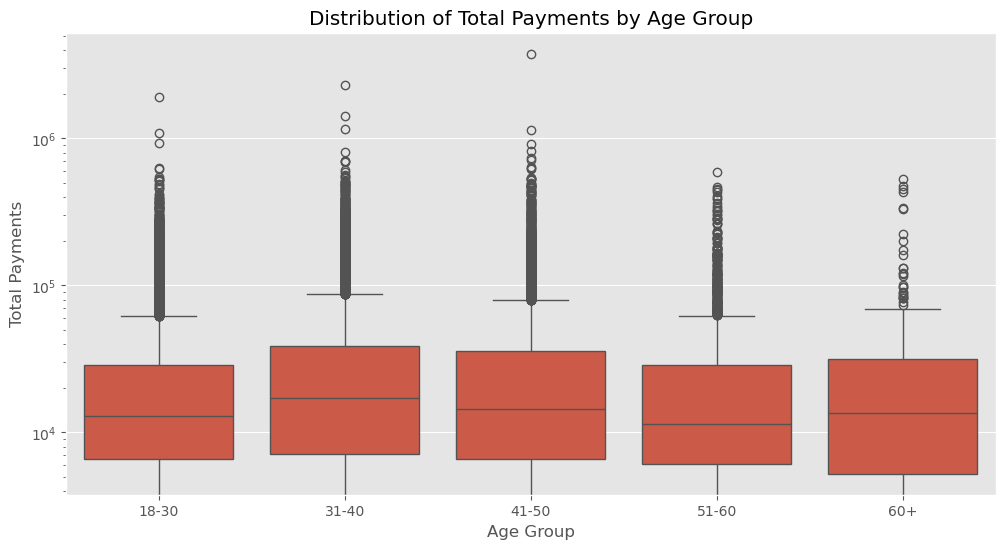

In [105]:
# Calculate total payments
merged_df['total_payments'] = merged_df[['payment_sept', 'payment_aug', 'payment_july', 'payment_june', 'payment_may', 'payment_april']].sum(axis=1)

# Age groups
merged_df['age_group'] = pd.cut(merged_df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Average payments by age group and gender
avg_payments = merged_df.groupby(['age_group', 'gender'])['total_payments'].mean().unstack()
print("Average payments by age group and gender:")
print(avg_payments)

# Correlation between age and total payments
correlation = merged_df['age'].corr(merged_df['total_payments'])
print(f"\
Correlation between age and total payments: {correlation:.2f}")

# Visualize average payments by age group and gender
plt.figure(figsize=(12, 6))
avg_payments.plot(kind='bar')
plt.title('Average Total Payments by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Total Payments')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot of total payments by age group

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='total_payments', data=merged_df)
plt.title('Distribution of Total Payments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Payments')
plt.yscale('log')  # Using log scale for better visualization
plt.show()

These insights suggest that while there are some differences in payment behavior across age groups and genders, the overall correlation between age and total payments is weak. 

The plot shows that the total payments distribution is fairly consistent across different age groups, with most people having similar payment amounts. However, in every age group, there are some individuals who have made much larger payments, as indicated by the presence of numerous outliers.

Correlation matrix:
                         credit_limit  total_statement_balance  total_payments
credit_limit                 1.000000                 0.302044        0.352655
total_statement_balance      0.302044                 1.000000        0.343906
total_payments               0.352655                 0.343906        1.000000


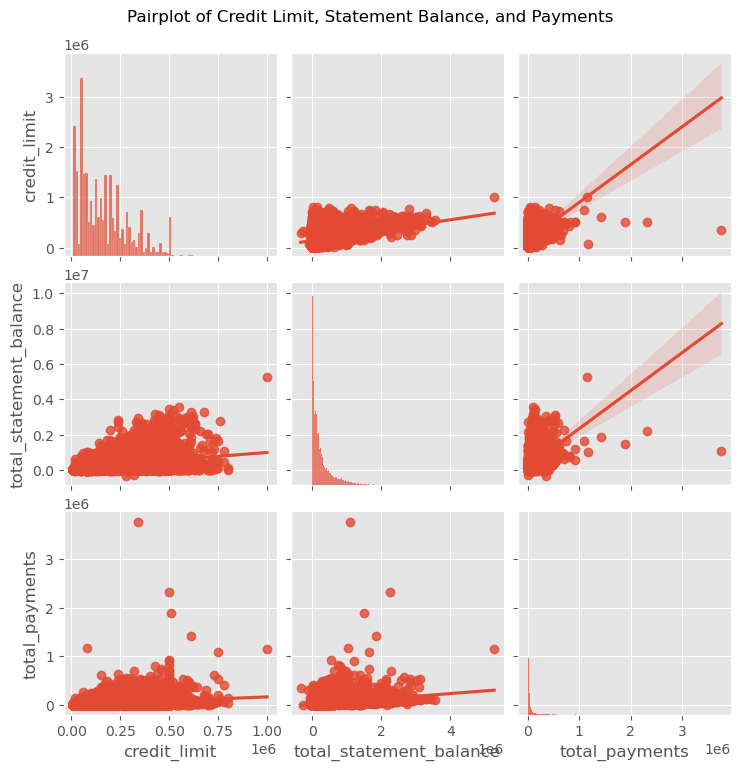

In [106]:
# Analyze the relationship between credit limit, statement balance, and payments

# Calculate total statement balance
merged_df['total_statement_balance'] = merged_df[['statement_bal_aug', 'statement_bal_jul', 'statement_bal_june', 'statement_bal_may', 'statement_bal_April', 'statement_bal_march']].sum(axis=1)

# Correlation between credit limit, total statement balance, and total payments
correlation_matrix = merged_df[['credit_limit', 'total_statement_balance', 'total_payments']].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the relationship using pairplot
sns.pairplot(merged_df, vars=['credit_limit', 'total_statement_balance', 'total_payments'], kind='reg')
plt.suptitle('Pairplot of Credit Limit, Statement Balance, and Payments', y=1.02)
plt.show()

Summary:
Correlation Matrix:
There is a moderate positive correlation between credit limit and total payments (0.35).
The correlation between credit limit and total statement balance is also moderate (0.30).
Total statement balance and total payments have a moderate correlation (0.34).
These correlations suggest that as the credit limit increases, both the total statement balance and total payments tend to increase as well. However, the relationships are not very strong, indicating other factors may also be influencing these variables.

In [107]:

# Define a function to calculate spending for each month
def calculate_spending(df):
    df['spending_aug'] = df['statement_bal_aug'] - df['statement_bal_jul'] + df['payment_sept']
    df['spending_july'] = df['statement_bal_jul'] - df['statement_bal_june'] + df['payment_aug']
    df['spending_june'] = df['statement_bal_june'] - df['statement_bal_may'] + df['payment_july']
    df['spending_may'] = df['statement_bal_may'] - df['statement_bal_April'] + df['payment_june']
    df['spending_april'] = df['statement_bal_April'] - df['statement_bal_march'] + df['payment_may']
    
    return df

In [108]:
calculate_spending(merged_df)

,customer_id,gender,education,marital_status,age,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,payment_april,default_payment_next_month,total_payments,age_group,total_statement_balance,spending_aug,spending_july,spending_june,spending_may,spending_april
0,1,F,university,married,24,20000.0,2,2,-1,-1,...,0.0,1,689.0,18-30,7704.0,811.0,3102.0,689.0,0.0,0.0
1,2,F,university,single,26,120000.0,-1,2,0,0,...,2000.0,1,5000.0,18-30,17077.0,957.0,43.0,410.0,817.0,194.0
2,3,F,university,single,34,90000.0,0,0,0,0,...,5000.0,0,11018.0,31-40,101653.0,16730.0,1968.0,228.0,383.0,399.0
3,4,F,university,married,37,50000.0,0,0,0,0,...,1000.0,0,8388.0,31-40,231334.0,757.0,961.0,22177.0,455.0,481.0
4,5,M,university,married,57,50000.0,-1,0,-1,0,...,679.0,0,59049.0,51-60,109339.0,4947.0,6516.0,24895.0,10794.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,high school,married,39,220000.0,0,0,0,0,...,1000.0,0,42550.0,31-40,725349.0,4633.0,4450.0,125364.0,59814.0,20257.0
29996,29997,M,high school,single,43,150000.0,-1,-1,-1,-1,...,0.0,0,14490.0,41-50,21182.0,1692.0,1852.0,3521.0,3918.0,5190.0
29997,29998,M,university,single,37,30000.0,4,3,2,-1,...,3100.0,1,31300.0,31-40,70496.0,209.0,598.0,3880.0,4496.0,3225.0
29998,29999,M,high school,married,41,80000.0,1,-1,0,0,...,1804.0,1,147181.0,41-50,266611.0,5876.0,5484.0,24708.0,42845.0,15875.0


In [109]:
merged_df['Total_spend']=merged_df[['spending_aug','spending_july','spending_june','spending_may','spending_april']].sum(axis=1)
merged_df.head()

,customer_id,gender,education,marital_status,age,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,default_payment_next_month,total_payments,age_group,total_statement_balance,spending_aug,spending_july,spending_june,spending_may,spending_april,Total_spend
0,1,F,university,married,24,20000.0,2,2,-1,-1,...,1,689.0,18-30,7704.0,811.0,3102.0,689.0,0.0,0.0,4602.0
1,2,F,university,single,26,120000.0,-1,2,0,0,...,1,5000.0,18-30,17077.0,957.0,43.0,410.0,817.0,194.0,2421.0
2,3,F,university,single,34,90000.0,0,0,0,0,...,0,11018.0,31-40,101653.0,16730.0,1968.0,228.0,383.0,399.0,19708.0
3,4,F,university,married,37,50000.0,0,0,0,0,...,0,8388.0,31-40,231334.0,757.0,961.0,22177.0,455.0,481.0,24831.0
4,5,M,university,married,57,50000.0,-1,0,-1,0,...,0,59049.0,51-60,109339.0,4947.0,6516.0,24895.0,10794.0,704.0,47856.0


These are for machine learning:
Here are five business problems that could be explored using the credit card payment dataset:

1. Predicting Credit Card Default Risk
Business Problem: Identify customers who are at risk of defaulting on their credit card payments in the next month.
How the Dataset Helps: By analyzing historical payment behavior (e.g., repayment status, payment amounts, statement balances), a predictive model can be developed to assess the likelihood of default. This could help financial institutions take proactive measures to reduce credit losses.
2. Customer Segmentation Based on Payment Behavior
Business Problem: Segment customers based on their spending and payment patterns to tailor marketing strategies and credit offerings.
How the Dataset Helps: By clustering customers based on their monthly spending, payments, and repayment status, businesses can create segments (e.g., regular payers, high spenders, delinquent payers) and offer personalized products, such as increased credit limits, rewards, or reminders for payments.
3. Optimizing Credit Limits
Business Problem: Determine optimal credit limits for customers to balance risk and profitability.
How the Dataset Helps: By analyzing a customer’s spending habits, payments, and existing credit limits, banks can adjust credit limits to better suit individual risk profiles. This would maximize usage while minimizing the chances of defaults.
4. Identifying High-Value Customers for Loyalty Programs
Business Problem: Identify customers who bring the most value to the company and design loyalty or rewards programs to retain them.
How the Dataset Helps: By analyzing spending patterns and payment behaviors over time, businesses can identify high-value customers who consistently spend and pay off their balances. These customers could be rewarded with loyalty programs to enhance retention and long-term value.
5. Reducing Late Payments through Targeted Interventions
Business Problem: Reduce the number of late or missed payments by implementing targeted interventions.
How the Dataset Helps: By examining the repayment status and payment history, businesses can identify customers who are likely to miss payments and proactively send them reminders or offer flexible payment plans. This could reduce delinquency rates and improve cash flow for the company.
Each of these business problems could drive actionable insights that contribute to improving customer relationships, reducing risk, and maximizing profitability.

1. Business Problem: High Rate of Credit Card Defaults
Analysis: High levels of missed payments or defaults can lead to financial losses for the company.
Recommendation: Perform a detailed analysis of customers with frequent late payments or defaults. Identify patterns such as overextended credit limits, consistently high balances, or sudden drops in payment amounts. Based on this analysis, recommend stricter credit limits for high-risk customers and provide flexible repayment plans to customers who miss payments occasionally but have a strong payment history.
2. Business Problem: Inefficient Credit Utilization
Analysis: Some customers might not be using their available credit efficiently, either underutilizing or maxing out their credit limits.
Recommendation: Segment customers based on their credit utilization (e.g., customers using less than 30% of their credit vs. those using over 80%). For underutilizers, consider offering incentives like rewards or promotional interest rates to encourage spending. For over-utilizers, advise a review of credit limits and implement programs that promote paying down balances to reduce the risk of default.
3. Business Problem: Poor Retention of High-Value Customers
Analysis: High-value customers (those who spend and pay regularly) may not be receiving enough attention, leading to attrition or reduced spending.
Recommendation: Conduct an analysis to identify high-value customers based on their spending and payment behavior. Provide personalized offers such as enhanced rewards, loyalty bonuses, or higher credit limits to retain these customers and incentivize continued spending. Additionally, set up alert systems for significant drops in spending so the company can intervene proactively.
4. Business Problem: Underperformance of Loyalty Programs
Analysis: Current loyalty or rewards programs may not be effectively motivating customers to spend more or make timely payments.
Recommendation: Analyze the spending habits of customers enrolled in loyalty programs vs. those who are not. If there is little difference in behavior, the loyalty programs may need to be restructured. Consider offering tiered rewards that increase as customers spend or pay more promptly. Also, design promotional campaigns targeting customers who are on the verge of reaching higher reward levels to encourage additional spending.
5. Business Problem: Lack of Insights into Seasonal Spending Patterns
Analysis: There may be seasonal trends in spending or payment behaviors that the company is not leveraging effectively.
Recommendation: Perform a time-series analysis of spending and payments to identify seasonal trends (e.g., increased spending during holidays or reduced payments in certain months). Use these insights to better plan marketing campaigns, adjust credit limits, or introduce temporary promotional offers. For example, if spending spikes in December but payment issues increase in January, consider offering balance transfer promotions or interest-free periods to ease post-holiday financial burdens.


C:\Users\User\AppData\Local\Temp\ipykernel_14016\1159710367.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default_payment_next_month', data=df, palette='Set2')


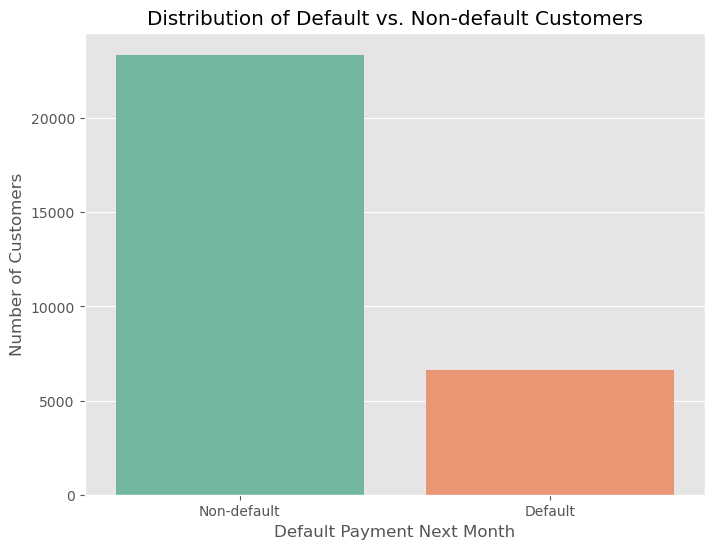

In [110]:
def plot_default_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='default_payment_next_month', data=df, palette='Set2')
    plt.title('Distribution of Default vs. Non-default Customers')
    plt.xlabel('Default Payment Next Month')
    plt.ylabel('Number of Customers')
    plt.xticks(ticks=[0, 1], labels=['Non-default', 'Default'])
    plt.show()

plot_default_distribution(merged_df)

C:\Users\User\AppData\Local\Temp\ipykernel_14016\1583650559.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='customer_value_segment', y='Total_spend', data=df, ci=None, palette='coolwarm')
C:\Users\User\AppData\Local\Temp\ipykernel_14016\1583650559.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_value_segment', y='Total_spend', data=df, ci=None, palette='coolwarm')


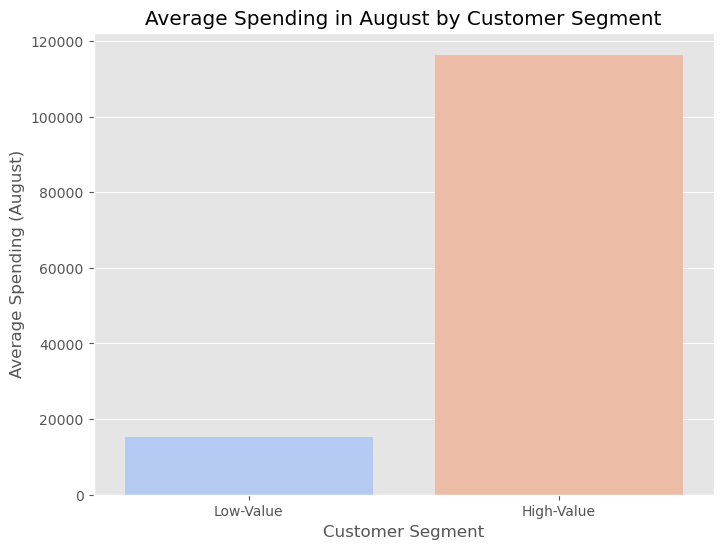

In [111]:
def plot_spending_by_value_segment(df):
    # Classify high-value customers as those spending above a certain threshold
    high_value_threshold = 50000  # Example threshold
    df['customer_value_segment'] = df['Total_spend'].apply(lambda x: 'High-Value' if x > high_value_threshold else 'Low-Value')
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x='customer_value_segment', y='Total_spend', data=df, ci=None, palette='coolwarm')
    plt.title('Average Spending in August by Customer Segment')
    plt.xlabel('Customer Segment')
    plt.ylabel('Average Spending (August)')
    plt.show()
plot_spending_by_value_segment(merged_df)

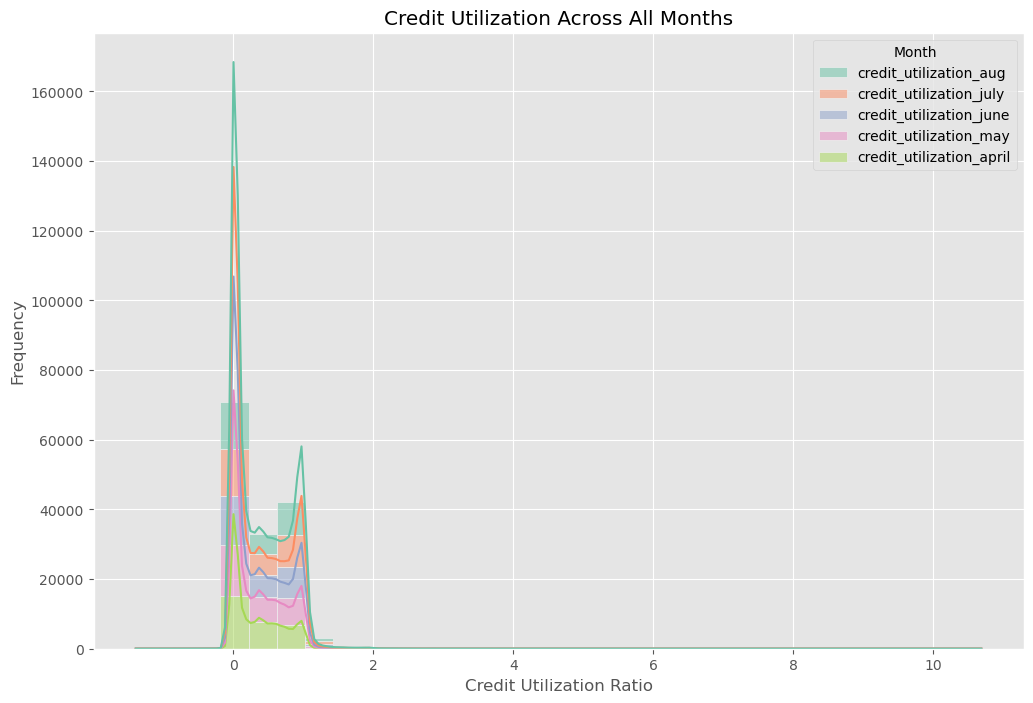

In [112]:
def plot_credit_utilization_all_months(df):
    # Calculate credit utilization for each month
    df['credit_utilization_aug'] = df['statement_bal_aug'] / df['credit_limit']
    df['credit_utilization_july'] = df['statement_bal_jul'] / df['credit_limit']
    df['credit_utilization_june'] = df['statement_bal_june'] / df['credit_limit']
    df['credit_utilization_may'] = df['statement_bal_may'] / df['credit_limit']
    df['credit_utilization_april'] = df['statement_bal_April'] / df['credit_limit']

    # Combine all the credit utilization columns into a single DataFrame for plotting
    utilization_df = pd.melt(df[['credit_utilization_aug', 'credit_utilization_july', 
                                 'credit_utilization_june', 'credit_utilization_may', 
                                 'credit_utilization_april']],
                             var_name='Month', value_name='Credit Utilization')
    
    # Plot a histogram for all months together
    plt.figure(figsize=(12, 8))
    sns.histplot(data=utilization_df, x='Credit Utilization', hue='Month', 
                 bins=30, kde=True, palette='Set2', multiple='stack')
    
    plt.title('Credit Utilization Across All Months')
    plt.xlabel('Credit Utilization Ratio')
    plt.ylabel('Frequency')
    plt.show()


plot_credit_utilization_all_months(merged_df)

In [113]:
# Prepare the credit utilization data
utilization_data = merged_df[['credit_utilization_aug', 'credit_utilization_july', 
                       'credit_utilization_june', 'credit_utilization_may', 
                       'credit_utilization_april']]

# Convert to JSON format
utilization_dict = utilization_data.to_dict(orient='records')

# Pretty-print the JSON and save to a file
with open('credit_utilization_pretty.json', 'w') as f:
    json.dump(utilization_dict, f, indent=4)

print("Pretty-printed data saved to credit_utilization_pretty.json")

Pretty-printed data saved to credit_utilization_pretty.json


Analysis of the Credit Utilization Histogram Across All Months:
Distribution Concentration:

The distribution of credit utilization is heavily concentrated around the lower end, particularly around a utilization ratio of 0 to 0.5. This indicates that the majority of customers are using less than 50% of their available credit across all months.
Minor Variation Across Months:

The distributions for each month are quite similar, showing that there is little variance in credit utilization month-over-month. Most months show a similar peak around the same utilization range, suggesting that overall credit usage behavior is consistent throughout the months.
Multiple Peaks:

There are smaller peaks around the 1.0 utilization ratio, indicating that some customers are maxing out their credit limits. These customers might be at a higher risk of default if their balances remain high relative to their credit limits.
Long Tail:

The distribution has a long right tail, showing that while most customers have low credit utilization, there are some customers with very high credit utilization (greater than 1.0, meaning they are over their credit limits). This small group of customers represents a potential risk segment, as high credit utilization is often linked to financial strain.
Business Insight:

Recommendation: Since most customers maintain a low credit utilization, the bank might consider offering targeted promotions to encourage greater spending for those with a utilization ratio under 30%. However, for the customers with very high utilization, financial coaching, credit counseling, or repayment assistance programs could be offered to mitigate the risk of default.
This analysis helps identify the spending behaviors of different customer segments and offers actionable insights for both risk management and marketing opportunities.

In [114]:

pd.set_option('max_colwidth', 400)
merged_df.head()

,customer_id,gender,education,marital_status,age,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,spending_june,spending_may,spending_april,Total_spend,customer_value_segment,credit_utilization_aug,credit_utilization_july,credit_utilization_june,credit_utilization_may,credit_utilization_april
0,1,F,university,married,24,20000.0,2,2,-1,-1,...,689.0,0.0,0.0,4602.0,Low-Value,0.195650,0.155100,0.034450,0.000000,0.000000
1,2,F,university,single,26,120000.0,-1,2,0,0,...,410.0,817.0,194.0,2421.0,Low-Value,0.022350,0.014375,0.022350,0.027267,0.028792
2,3,F,university,single,34,90000.0,0,0,0,0,...,228.0,383.0,399.0,19708.0,Low-Value,0.324878,0.155856,0.150656,0.159233,0.166089
3,4,F,university,married,37,50000.0,0,0,0,0,...,22177.0,455.0,481.0,24831.0,Low-Value,0.939800,0.964660,0.985820,0.566280,0.579180
4,5,M,university,married,57,50000.0,-1,0,-1,0,...,24895.0,10794.0,704.0,47856.0,Low-Value,0.172340,0.113400,0.716700,0.418800,0.382920


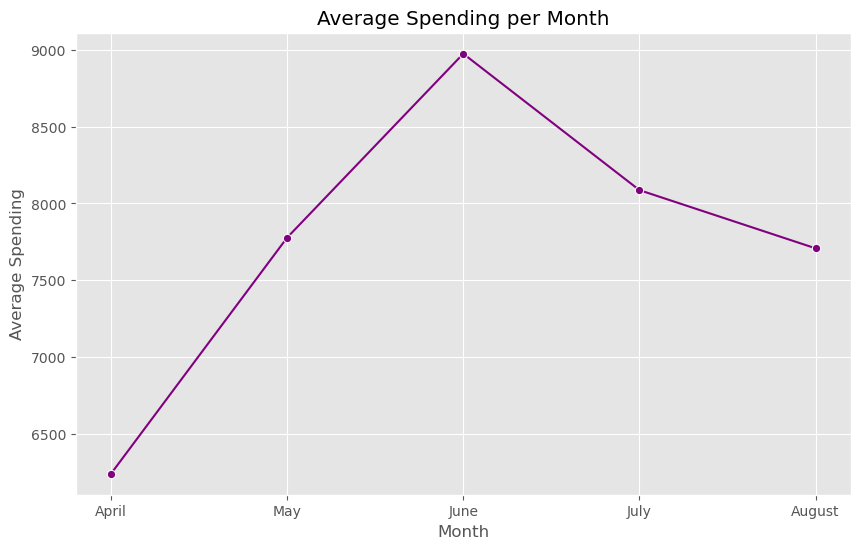

In [115]:
def plot_seasonal_spending(df):
    # Assuming spending columns for different months
    spending_columns = ['spending_april', 'spending_may', 'spending_june', 'spending_july', 'spending_aug']
    
    # Calculate average spending per month
    monthly_spending = df[spending_columns].mean().reset_index()
    monthly_spending.columns = ['Month', 'Average Spending']
    
    # Rename the months for clarity
    monthly_spending['Month'] = ['April', 'May', 'June', 'July', 'August']
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Month', y='Average Spending', data=monthly_spending, marker='o', color='purple')
    plt.title('Average Spending per Month')
    plt.xlabel('Month')
    plt.ylabel('Average Spending')
    plt.show()


plot_seasonal_spending(merged_df)